In [1]:
#import packages
import sklearn
from sklearn.ensemble import RandomForestRegressor
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.datasets import make_regression
import sklearn.neighbors.base
from missingpy import MissForest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('data_larsen.csv', sep=';', parse_dates=['Date'])
observations=df[(df['Date']>='01/01/2011') & (df['Date']<'01/01/2012')]

In [56]:
observations['Date'] = pd.to_datetime(observations['Date'])

In [57]:
corr_matrix=observations.corr()
corr_matrix

,TTT,THETA,Surf temp,Surf temp.1,Humidity spec,Humidity spec.1,RH,ff,PPPP,Cloud cov,...,LWU_model,LWU,NET,Qh [W/m**2],Qe,Ground heat flux,Melt rate,Melt rate_cum,Runoff,Sublimation
TTT,1.000000,0.997327,0.990392,0.993208,0.944343,0.932036,-0.531583,0.170925,-0.386968,0.223303,...,0.990516,0.991632,0.440283,-0.181971,-0.505809,-0.074125,0.342397,-0.019263,NaN,-0.515631
THETA,0.997327,1.000000,0.989098,0.991377,0.942387,0.929315,-0.520497,0.184708,-0.453221,0.229172,...,0.988838,0.989587,0.439425,-0.187532,-0.505675,-0.072672,0.337099,-0.007557,NaN,-0.515342
Surf temp,0.990392,0.989098,1.000000,0.991392,0.931774,0.930074,-0.496755,0.194075,-0.401172,0.291654,...,0.997968,0.989047,0.479509,-0.277099,-0.541100,-0.071032,0.313947,-0.020273,NaN,-0.548921
Surf temp.1,0.993208,0.991377,0.991392,1.000000,0.940719,0.936016,-0.499567,0.191829,-0.396892,0.278128,...,0.991948,0.998225,0.484480,-0.242605,-0.538025,-0.096349,0.332395,-0.017470,NaN,-0.546810
Humidity spec,0.944343,0.942387,0.931774,0.940719,1.000000,0.983891,-0.478716,0.122679,-0.367233,0.162707,...,0.950125,0.956654,0.428498,-0.167544,-0.523791,0.011322,0.408211,-0.035789,NaN,-0.537522
Humidity spec.1,0.932036,0.929315,0.930074,0.936016,0.983891,1.000000,-0.545600,0.106607,-0.352799,0.164198,...,0.950931,0.954363,0.512902,-0.243263,-0.640300,-0.002996,0.423693,-0.012504,NaN,-0.650833
RH,-0.531583,-0.520497,-0.496755,-0.499567,-0.478716,-0.545600,1.000000,-0.034589,0.083222,0.190488,...,-0.509641,-0.512256,-0.371312,-0.136904,0.511830,0.153889,-0.420498,-0.100682,NaN,0.516793
ff,0.170925,0.184708,0.194075,0.191829,0.122679,0.106607,-0.034589,1.000000,-0.240707,0.129894,...,0.180016,0.180910,0.053856,0.089353,-0.139858,-0.151770,-0.035065,0.046361,NaN,-0.135579
PPPP,-0.386968,-0.453221,-0.401172,-0.396892,-0.367233,-0.352799,0.083222,-0.240707,1.000000,-0.175037,...,-0.395347,-0.392664,-0.174377,0.150521,0.206344,0.013962,-0.075011,-0.130114,NaN,0.208420
Cloud cov,0.223303,0.229172,0.291654,0.278128,0.162707,0.164198,0.190488,0.129894,-0.175037,1.000000,...,0.269723,0.261035,0.373854,-0.482812,-0.095566,-0.228624,-0.002009,0.001238,NaN,-0.082280


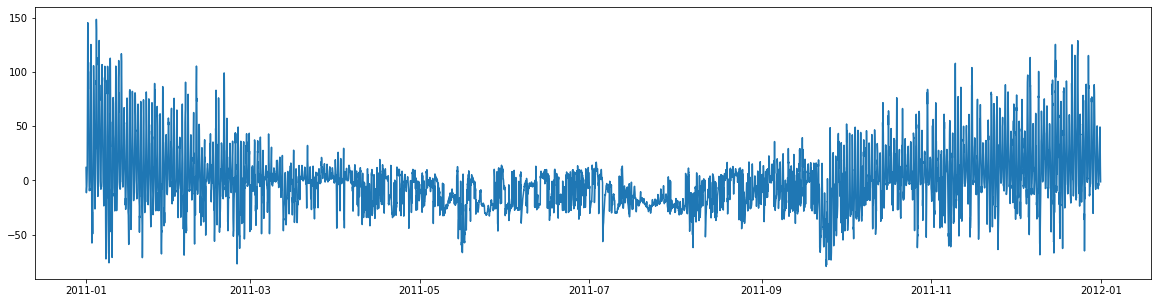

In [58]:
plt.figure(figsize=(20, 5))

plt.plot(observations['Date'],observations['NET'])

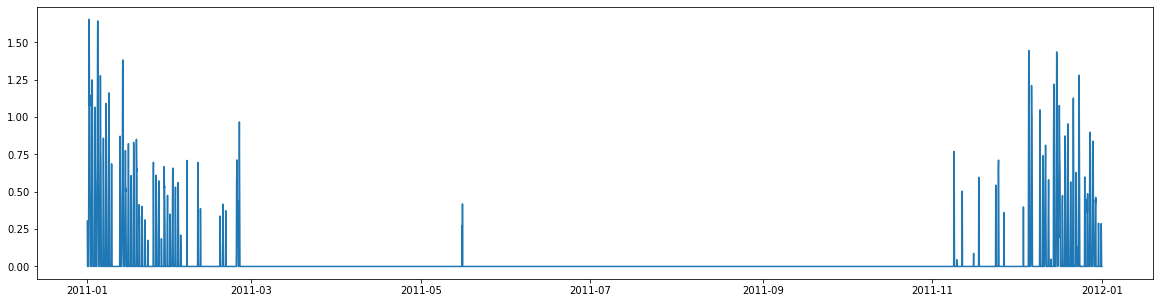

In [59]:
plt.figure(figsize=(20, 5))

plt.plot(observations['Date'],observations['Melt rate'])

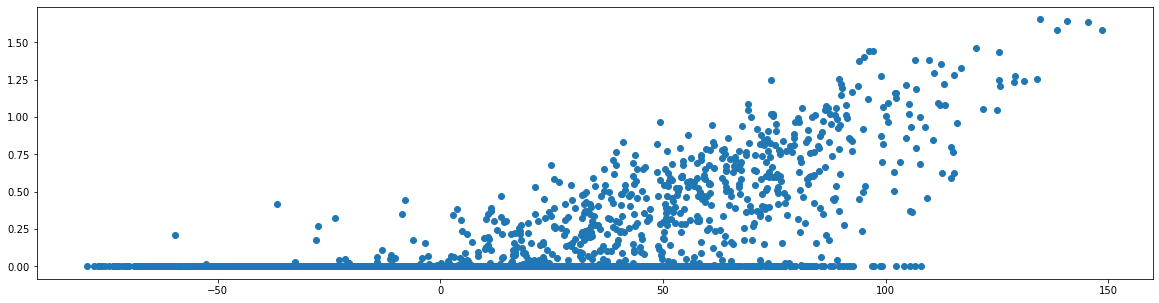

In [61]:
plt.figure(figsize=(20, 5))

plt.scatter(observations['NET'],observations['Melt rate'])